<a href="https://colab.research.google.com/github/Vicky-0222/ML/blob/master/lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задача регрессии

In [66]:
! pip install pandas scikit-learn seaborn scipy

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Загрузка набора данных
df = pd.read_csv('/content/seeds.csv')

In [68]:
# проверка на пропущенные значения
print(df.isnull().sum())

area           0
perimeter      0
compactness    3
length         0
width          1
asymmetry      0
length.1       0
dtype: int64


In [69]:
# Заполнение пропусков медианой
df_median = df.copy()
df_median.compactness = df_median.compactness.fillna(df_median.compactness.median())
df_median.width = df_median.width.fillna(df_median.width.median())

print(df_median.isnull().sum())

area           0
perimeter      0
compactness    0
length         0
width          0
asymmetry      0
length.1       0
dtype: int64


In [70]:
y = df_median['area'] # выбираем целевую переменную (количественная)
X = df_median.drop('area', axis=1) # переменные для проверки влияния

In [71]:
X

,perimeter,compactness,length,width,asymmetry,length.1
0,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.94,0.8955,5.324,3.379,2.259,4.805
4,14.99,0.9034,5.658,3.562,1.355,5.175
...,...,...,...,...,...,...
205,13.20,0.8783,5.137,2.981,3.631,4.870
206,12.88,0.8511,5.140,2.795,4.325,5.003
207,13.66,0.8883,5.236,3.232,8.315,5.056
208,13.21,0.8521,5.175,2.836,3.598,5.044


In [72]:
y

,area
0,15.26
1,14.88
2,14.29
3,13.84
4,16.14
...,...
205,12.19
206,11.23
207,13.20
208,11.84


In [73]:
df_corr_test = X.copy()

# Добавляем целевую переменную в копию данных
df_corr_test['y'] = y
df_corr_test

,perimeter,compactness,length,width,asymmetry,length.1,y
0,14.84,0.8710,5.763,3.312,2.221,5.220,15.26
1,14.57,0.8811,5.554,3.333,1.018,4.956,14.88
2,14.09,0.9050,5.291,3.337,2.699,4.825,14.29
3,13.94,0.8955,5.324,3.379,2.259,4.805,13.84
4,14.99,0.9034,5.658,3.562,1.355,5.175,16.14
...,...,...,...,...,...,...,...
205,13.20,0.8783,5.137,2.981,3.631,4.870,12.19
206,12.88,0.8511,5.140,2.795,4.325,5.003,11.23
207,13.66,0.8883,5.236,3.232,8.315,5.056,13.20
208,13.21,0.8521,5.175,2.836,3.598,5.044,11.84


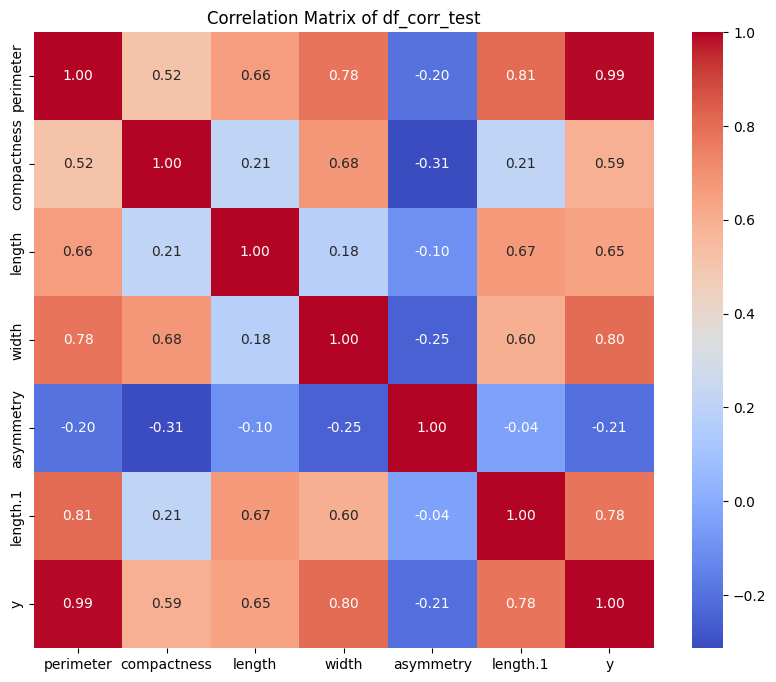

In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Предположим, что у вас уже есть DataFrame под названием df_corr_test
# Выводим матрицу корреляции (только для числовых столбцов)
correlation_matrix = df_corr_test.select_dtypes(['int', 'float']).corr()

# Отображаем матрицу корреляции с помощью тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of df_corr_test")
plt.show()

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def resolve_regression(X, y, regularization=None):
    """
    Выполняет регрессию с учетом регуляризации.

    Parameters:
    - X: Входные данные (признаки).
    - y: Целевые значения.
    - regularization: Тип регуляризации ('l1', 'l2', None). Если None, используется обычная линейная регрессия.
    """
    # Разделение данных на обучающую и тестовую выборки (80% / 20%)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Инициализация модели в зависимости от типа регуляризации
    if regularization == 'l1':
        model = Lasso() # L1-регуляризация (Lasso)
    elif regularization == 'l2':
        model = Ridge() # L2-регуляризация (Ridge)
    else:
        model = LinearRegression() # Линейная регрессия без регуляризации

    # Обучение модели
    model.fit(X_train, y_train)

    # Предсказание на тестовой выборке
    y_pred = model.predict(X_test)

    # Вычисление метрик качества
    mae = mean_absolute_error(y_test, y_pred) # Средняя абсолютная ошибка
    mse = mean_squared_error(y_test, y_pred)  # Средняя квадратичная ошибка
    r2 = r2_score(y_test, y_pred)             # Коэффициент детерминации (R^2)

    # Вывод результатов
    print(f"Regularization: {regularization}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"R^2 Score: {r2:.2f}")

    return model, X_train, X_test, y_train, y_test

In [76]:
resolve_regression(X, y)
None # Используем None (оператор ничего не делает) чтобы убрать вывод от return у функции resolve_regression. Пока он нам не нужен и и будет мешать

Regularization: None
Mean Absolute Error (MAE): 0.09
Mean Squared Error (MSE): 0.01
R^2 Score: 1.00


In [77]:
resolve_regression(X[['perimeter', 'length', 'width']], y)
None

Regularization: None
Mean Absolute Error (MAE): 0.22
Mean Squared Error (MSE): 0.07
R^2 Score: 0.99


In [78]:
X

,perimeter,compactness,length,width,asymmetry,length.1
0,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.94,0.8955,5.324,3.379,2.259,4.805
4,14.99,0.9034,5.658,3.562,1.355,5.175
...,...,...,...,...,...,...
205,13.20,0.8783,5.137,2.981,3.631,4.870
206,12.88,0.8511,5.140,2.795,4.325,5.003
207,13.66,0.8883,5.236,3.232,8.315,5.056
208,13.21,0.8521,5.175,2.836,3.598,5.044


In [79]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   perimeter    210 non-null    float64
 1   compactness  210 non-null    float64
 2   length       210 non-null    float64
 3   width        210 non-null    float64
 4   asymmetry    210 non-null    float64
 5   length.1     210 non-null    float64
dtypes: float64(6)
memory usage: 10.0 KB


In [80]:
import pandas as pd
import numpy as np

def select_features_correlation(X, y, max_features=5):
    # Вычисляем корреляцию признаков с целевой переменной
    correlation = X.apply(lambda col: np.abs(col.corr(y)))

    # Отбираем top-N признаков с наибольшей корреляцией
    top_features = correlation.nlargest(max_features).index

    # Возвращаем X и y с отобранными признаками
    return X[top_features], y

In [81]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

def select_features_rfe(X, y, max_features=5):
    # Инициализация модели линейной регрессии
    model = LinearRegression()

    # RFE с указанным количеством признаков
    selector = RFE(model, n_features_to_select=max_features)
    selector = selector.fit(X, y)

    # Отбор признаков
    selected_features = X.columns[selector.support_]

    # Возвращаем X и y с отобранными признаками
    return X[selected_features], y

In [82]:
# Предположим, что у вас есть данные X и y
# Используем отбор на основе корреляции
X_selected_corr, y_selected_corr = select_features_correlation(X, y, max_features=5)

# Используем отбор с помощью RFE
X_selected_rfe, y_selected_rfe = select_features_rfe(X, y, max_features=5)

In [83]:
resolve_regression(X_selected_corr, y_selected_corr)
None

Regularization: None
Mean Absolute Error (MAE): 0.09
Mean Squared Error (MSE): 0.01
R^2 Score: 1.00


In [84]:
resolve_regression(X_selected_rfe, y_selected_rfe)
None

Regularization: None
Mean Absolute Error (MAE): 0.09
Mean Squared Error (MSE): 0.01
R^2 Score: 1.00


Regularization: None
Mean Absolute Error (MAE): 0.09
Mean Squared Error (MSE): 0.01
R^2 Score: 1.00


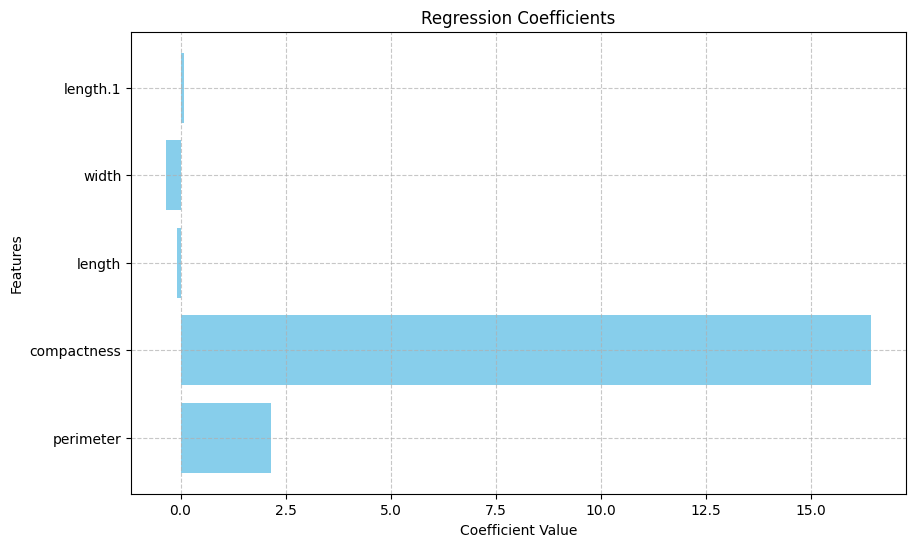

In [85]:
import matplotlib.pyplot as plt

def plot_regression_coefficients(model, feature_names):
    # Извлекаем коэффициенты регрессии
    coefficients = model.coef_

    # Создаем столбчатую диаграмму для визуализации коэффициентов
    plt.figure(figsize=(10, 6))
    plt.barh(feature_names, coefficients, color='skyblue')
    plt.xlabel("Coefficient Value")
    plt.ylabel("Features")
    plt.title("Regression Coefficients")
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

# Пример использования:
# Сначала выполним линейную регрессию
model, X_train, X_test, y_train, y_test = resolve_regression(X_selected_rfe, y_selected_rfe, None)

# Визуализация коэффициентов регрессии
plot_regression_coefficients(model, X_selected_rfe.columns)

In [94]:
# Выбираем числовые признаки
numeric_features = X_selected_rfe.select_dtypes(include=['float64']).columns.tolist()

# Инициализируем scaler
scaler = MinMaxScaler()

# Применяем нормализацию
X_selected_rfe[numeric_features] = scaler.fit_transform(X_selected_rfe[numeric_features])

<ipython-input-94-5f572d6f06ae>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_selected_rfe[numeric_features] = scaler.fit_transform(X_selected_rfe[numeric_features])


In [95]:
X_selected_rfe

,perimeter,compactness,length,width,length.1
0,0.502066,0.570780,0.844265,0.253061,0.533846
1,0.446281,0.662432,0.808576,0.260853,0.452615
2,0.347107,0.879310,0.763665,0.262338,0.412308
3,0.316116,0.793103,0.769300,0.277922,0.406154
4,0.533058,0.864791,0.826335,0.345826,0.520000
...,...,...,...,...,...
205,0.163223,0.637024,0.737368,0.130241,0.426154
206,0.097107,0.390200,0.737880,0.061224,0.467077
207,0.258264,0.727768,0.754273,0.223377,0.483385
208,0.165289,0.399274,0.743857,0.076438,0.479692


Regularization: None
Mean Absolute Error (MAE): 0.09
Mean Squared Error (MSE): 0.01
R^2 Score: 1.00


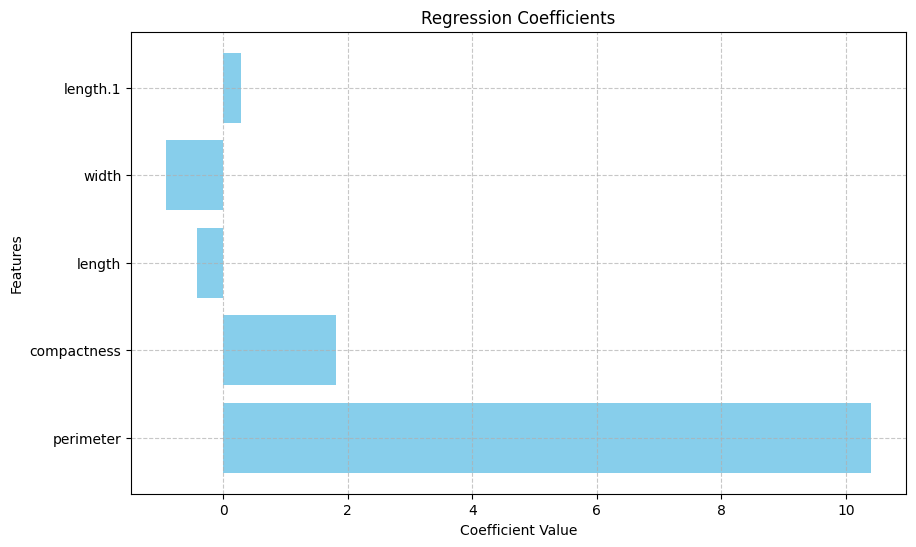

In [96]:
# Сначала выполним линейную регрессию
model, X_train, X_test, y_train, y_test = resolve_regression(X_selected_rfe, y_selected_rfe)

# Визуализация коэффициентов регрессии
plot_regression_coefficients(model, X_selected_rfe.columns)

In [89]:
# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Вычисление метрик качества
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Вывод метрик
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Absolute Error (MAE): 0.09
Mean Squared Error (MSE): 0.01
R^2 Score: 1.00


In [90]:
X

,perimeter,compactness,length,width,asymmetry,length.1
0,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.94,0.8955,5.324,3.379,2.259,4.805
4,14.99,0.9034,5.658,3.562,1.355,5.175
...,...,...,...,...,...,...
205,13.20,0.8783,5.137,2.981,3.631,4.870
206,12.88,0.8511,5.140,2.795,4.325,5.003
207,13.66,0.8883,5.236,3.232,8.315,5.056
208,13.21,0.8521,5.175,2.836,3.598,5.044


Regularization: l1
Mean Absolute Error (MAE): 0.70
Mean Squared Error (MSE): 0.67
R^2 Score: 0.92


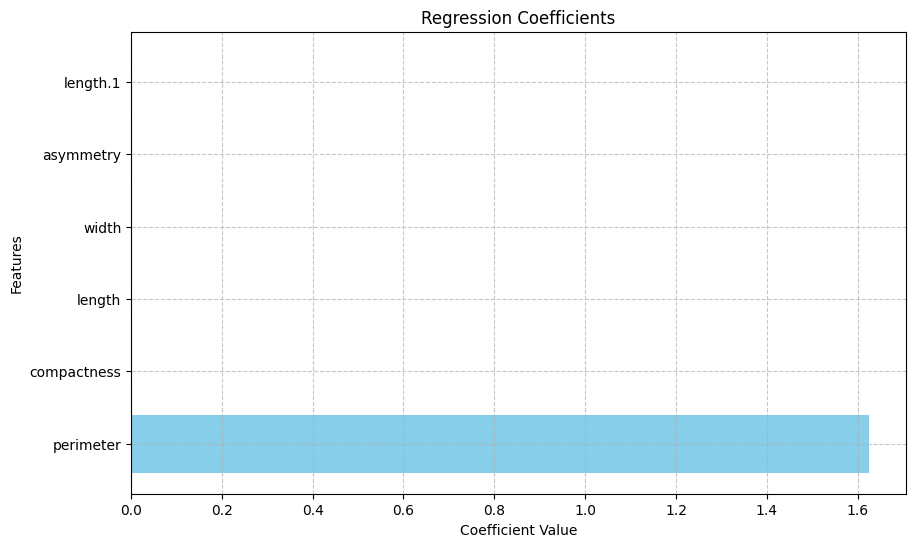

In [91]:
# L1-регуляризация
model, _, _, _, _ = resolve_regression(X, y, regularization='l1')
None

# Визуализация коэффициентов регрессии
plot_regression_coefficients(model, X.columns)

Regularization: l2
Mean Absolute Error (MAE): 0.18
Mean Squared Error (MSE): 0.05
R^2 Score: 0.99


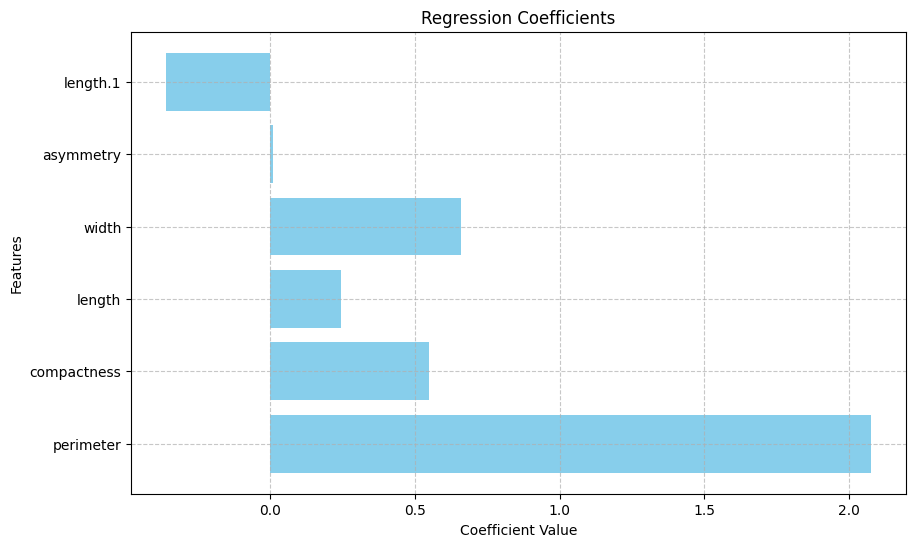

In [92]:
# L2-регуляризация
model, _, _, _, _ = resolve_regression(X, y, regularization='l2')
None

# Визуализация коэффициентов регрессии
plot_regression_coefficients(model, X.columns)

Regularization: None
Mean Absolute Error (MAE): 0.09
Mean Squared Error (MSE): 0.01
R^2 Score: 1.00


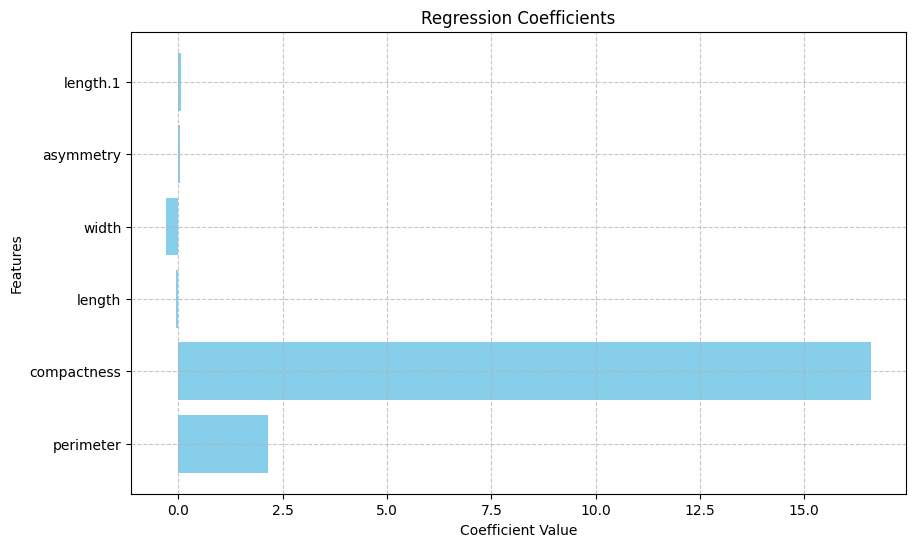

In [93]:
# Без регуляризации
model, _, _, _, _  = resolve_regression(X, y, regularization=None)
None

# Визуализация коэффициентов регрессии
plot_regression_coefficients(model, X.columns)